Objective:

Conduct detailed analyses of heart-related conditions and treatments.

Build a logistic regression model to predict whether a patient has heart disease or not. Calculate the feature importance as well.

# Step 1: Import libraries
Hints:

Import logistic regression model from sklearn.linear_model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

# Step 2: Load data
Hints:

Use the read_csv method of pandas to load the csv file

In [2]:
df = pd.read_csv(r"/Users/mymac/Documents/Data Science Bootcamp/Week 16 - Regularization - Ridge and Lasso Regression/heart_disease.csv")

# Step 3: Exploratory Data Analysis (EDA)
Display the top 5 rows of the dataframe
Hints:

Use head method of pandas to get the top 5 rows of the dataframe

In [3]:
df_head = df.head()
df_head

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Print the shape of the dataframe
Hints:

To get the shape of the DataFrame (number of rows and columns), you can use the shape attribute of the DataFrame

In [4]:
df_shape = df.shape
print("Data shape:", df_shape)

Data shape: (303, 14)


# Information about dataframe
Hints:

To display information about the DataFrame, including data types and non-null values count, you can use the info method.

In [5]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    int64  
 1   gender           303 non-null    int64  
 2   cp               303 non-null    int64  
 3   trestbps         303 non-null    int64  
 4   chol             303 non-null    int64  
 5   fbs              303 non-null    int64  
 6   restecg          303 non-null    int64  
 7   thalach          303 non-null    int64  
 8   exang            303 non-null    int64  
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    int64  
 11  ca               303 non-null    int64  
 12  thal             303 non-null    int64  
 13  heart_diagnosis  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Drop the rows with missing values
Hints:

Check the information printed about the dataframe and look for any null values
Use the dropna method to drop the rows with any missing values

In [6]:
df.dropna(inplace=True)

# Check null values count
Hints:

To check for missing values in the DataFrame, you can use the isnull method followed by the sum method.

In [7]:
df_null_count = df.isnull().sum()
df_null_count

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
heart_diagnosis    0
dtype: int64

# Summary statistics
Note that all the columns in the current data are either float or integer
Hints:

To get summary statistics of the DataFrame (e.g., mean, min, max), you can use the describe method.

In [8]:
#For numerical columns
df_summary_numeric=df.describe()
df_summary_numeric

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Check correlations
The correlation heatmap shows the correlation between all the numerical variables. This indicates which variables are related to the target and to each other.The magnitude and sign indicate the strength and direction of linear relation.
If there are highly correlated input features we will drop one of them to avoid multi-collinearity.
We are setting numeric_only=True to run correlation on only numeric variables
Hints:

You need to run corr on your dataframe
Pass the variable containing correlation information to heatmap

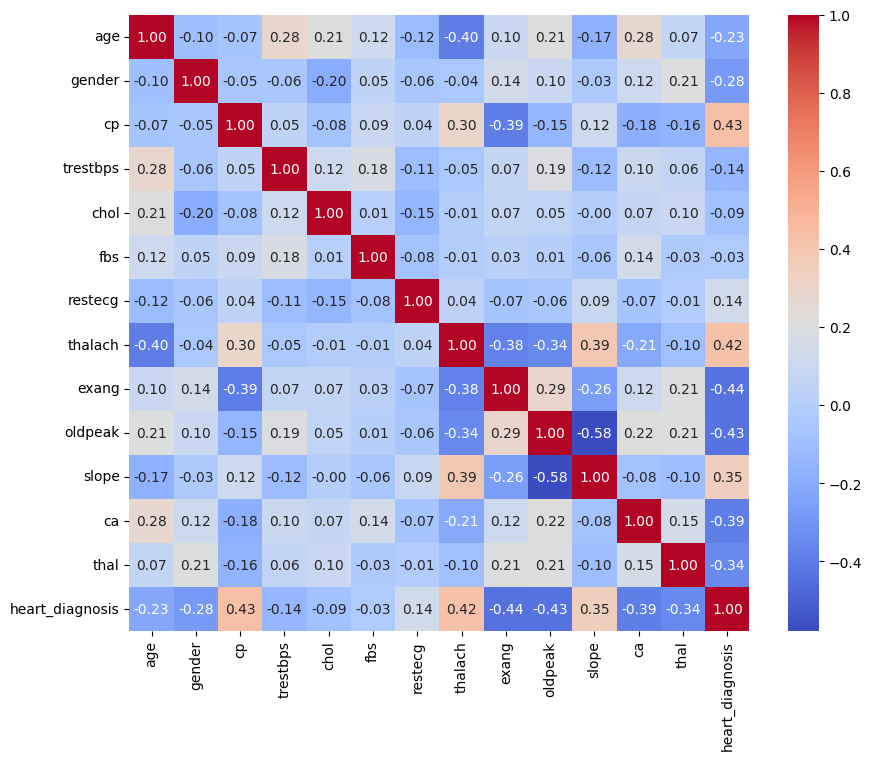

In [9]:
plt.figure(figsize=(10, 8))
corr = df.corr()
correlation_heatmap=sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
             cmap='coolwarm', fmt=".2f")
plt.show()

# Check distribution of the heart_diagnosis variable
Hints:

Use the value_counts method on the heart_diagnosis column

In [10]:
heart_diagnosis_distribution = df['heart_diagnosis'].value_counts()
print("Target variable distribution:\n", heart_diagnosis_distribution)

Target variable distribution:
 1    165
0    138
Name: heart_diagnosis, dtype: int64


# Histograms of all numerical columns
Hints:

For defining the number of columns and rows for subplots:

Access the number of columns in your DataFrame from shape attribute
Determine the number of rows needed for subplots by subtracting 1 from the number of columns and then using integer division (// 2 + 1).
For creating subplots:

Use subplots method from matplotlib.pyplot to create subplots. Specify the number of rows and columns using the values calculated in step 2.
Adjust the vertical spacing between subplots using subplots_adjust method on fig and pass the hspace=0.5 as a parameter to avoid overlapping.
For flattening the axes array:

Flatten the 2D array of subplot axes into a 1D array using flatten method on axes for easier iteration.
For plotting histograms for each column:

Use a for loop to iterate through each column in the DataFrame.
Skip plotting the target variable (e.g., 'heart_diagnosis') if it's in the DataFrame by using a conditional statement.
Access the data in the column using df[column].
Set the color of the histogram using the color parameter when calling ax.hist().
Specify the number of bins for the histogram using the bins parameter when calling ax.hist().
Set an appropriate title for the subplot using ax.set_title().
Label the x and y axes with descriptions of the data using ax.set_xlabel() and ax.set_ylabel().
Adjust the fontsize for better legibility by setting the fontsize parameter for titles, labels, etc.
Show each individual plot using show method of matplotlib.pyplot within the loop.
For removing any empty subplots:

After the loop, remove any empty subplots that might remain by using delaxes method on fig
For displaying the subplots:

Finally, display the subplots by calling show method of matplotlib.pyplot at the end of your code.

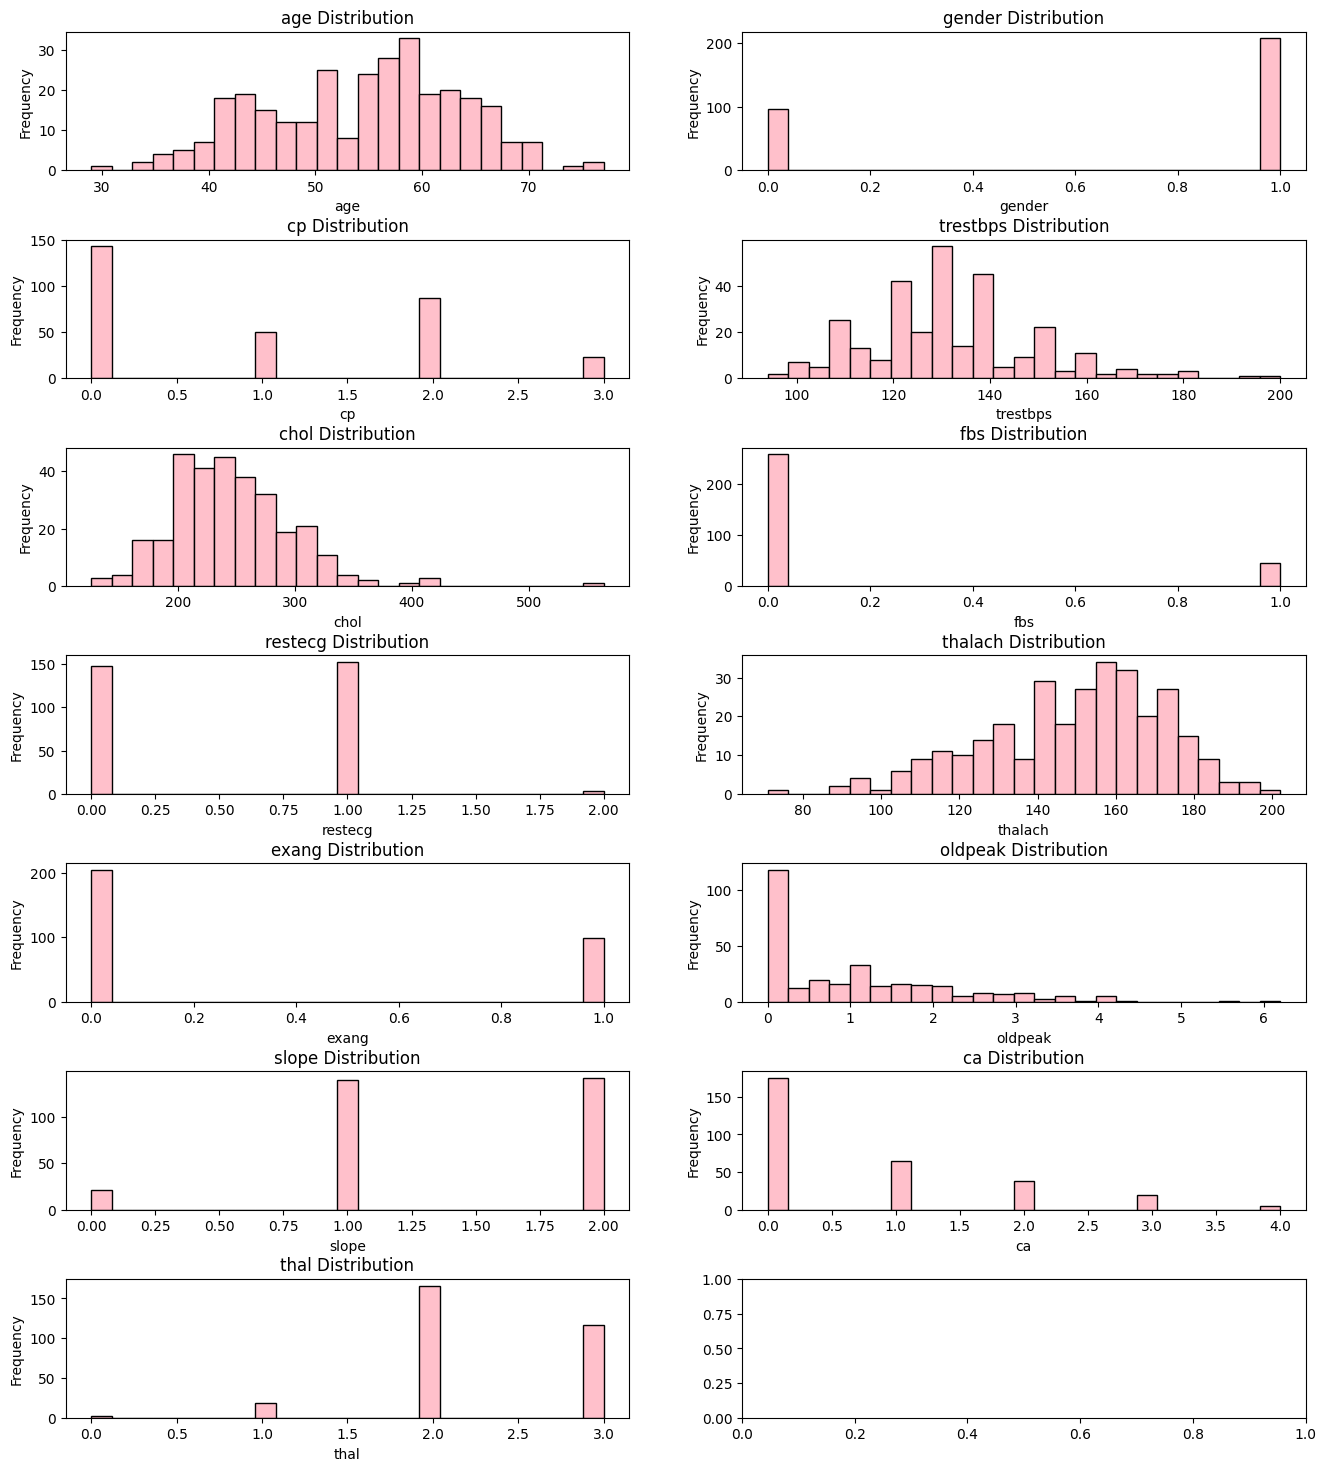

In [11]:
# Define the number of columns and rows for subplots
num_cols = df.shape[1]              # Number of columns in the DataFrame
num_rows = (num_cols - 1) // 2 + 1  # Calculate the number of rows needed for subplots

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(16, 18))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(df.columns):
    if column == 'heart_diagnosis':
        continue                      # Skip the target variable if it's in the DataFrame
    ax = axes[i]
    ax.hist(df[column], bins=25, color='pink', edgecolor='black')
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)              # set the label for x-axis
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

# Show the subplots
plt.show()

# Step 4: Target column preprocessing
Hint:

heart_diagnosis:

Diagnosis of heart disease (angiographic disease status)

  (0 = No heart disease, >0 = heart disease).

In [12]:
df['heart_diagnosis'] = df['heart_diagnosis'].apply(lambda x: 0 if x==0 else 1 )

In [13]:
heart_diagnosis_distribution_pp = df['heart_diagnosis'].value_counts()
print("Target variable distribution after preprocessing:\n", heart_diagnosis_distribution_pp)

Target variable distribution after preprocessing:
 1    165
0    138
Name: heart_diagnosis, dtype: int64


# Step 5:Transform the categorical features which have more than two classes
The binary categorical columns in the current data are already good to use as it is, since they already only have 0 and 1 .
Hints:

Define the subset of columns to one-hot encode

Perform one-hot encoding on the selected columns using get dummies method of pandas and concatenate with the original DataFrame

Drop the original columns that were one-hot encoded using drop method

In [14]:
columns_to_encode = ['cp', 'restecg', 'ca', 'thal']
df[columns_to_encode] = df[columns_to_encode].astype(str)
df = pd.concat([df, pd.get_dummies(df[columns_to_encode])], axis=1)
df.drop(columns=columns_to_encode, inplace=True)

In [15]:
df.columns

Index(['age', 'gender', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'slope', 'heart_diagnosis', 'cp_0', 'cp_1', 'cp_2', 'cp_3',
       'restecg_0', 'restecg_1', 'restecg_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3',
       'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [16]:
df.head()

,age,gender,trestbps,chol,fbs,thalach,exang,oldpeak,slope,heart_diagnosis,...,restecg_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,1,...,0,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,2,1,...,0,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,1,...,0,1,0,0,0,0,0,0,1,0


# Step 6: Seperate input and target features
Hints:

Create feature matrix X by dropping the target variable ("heart_diagnosis") from the DataFrame

Create a target vector y by selecting the target variable ("heart_diagnosis") from the DataFrame

In [17]:
X = df.drop('heart_diagnosis', axis=1)
y = df['heart_diagnosis']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (303, 25)
y shape: (303,)


# Step 7: Scaling numeric features
Normalization of Feature Scales:
Feature scaling ensures that all numeric features in a dataset have similar scales or ranges. It prevents certain features from dominating the learning process due to their larger scale, making the model more balanced.

Categorical features, on the other hand, are typically non-numeric and represent categories or labels rather than continuous values. Scaling categorical features is not meaningful because the scaling process would not preserve the categorical information
Hints:

Create a StandardScaler Object:

Create an instance of the StandardScaler from scikit-learn and assign it to the scaler variable.
This step initializes the scaler, allowing you to use it for feature scaling.
Fit the Scaler to the Data:

Use the fit_transform method on the scaler object to fit it to the data (X) and simultaneously transform (fit_transform) the data to scale its numeric features.
This step calculates the mean and standard deviation of each numeric feature in the data and scales the features accordingly.

In [18]:
# Displaying the columns in the training data
X.columns 

Index(['age', 'gender', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'slope', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4',
       'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [19]:
scaler = StandardScaler()
X[['age','trestbps', 'chol', 'fbs','thalach','oldpeak', 'slope', 'ca_0', 'ca_1',
       'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3']] = (
    scaler.fit_transform(X[['age','trestbps', 'chol', 'fbs','thalach','oldpeak', 'slope', 'ca_0', 'ca_1',
       'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3']]))

# Step 8 : Build the model
Hints:

Create a logistic regression model instance by initializing LogisticRegression().

Train the logistic regression model by fitting it to the data. Use the fit method and provide X (training features) and y (training labels) as input.

In [20]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

# Step 9: Feature importance
Hints:

Obtain the coefficients of the logistic regression model using the coef_ attribute and assign them to model_coefs.

Retrieve the intercept of the logistic regression model using the intercept_ attribute and assign it to model_intercept.

In [21]:
model_coefs = model.coef_
model_intercept = model.intercept_
print('Coefficients:', model_coefs)
print('Intercept:',model_intercept)

Coefficients: [[ 0.19381782 -1.24163597 -0.37735306 -0.2060193   0.14947396  0.48453759
  -0.69789694 -0.42202646  0.45164171 -1.11465007 -0.15002821  0.5987786
   0.6654173  -0.1635221   0.27162432 -0.1085846   0.65524457 -0.30873271
  -0.53684122 -0.20402426  0.24747622 -0.11762402  0.14786979  0.34638187
  -0.4063259 ]]
Intercept: [1.49685748]


Negative coefficients in logistic regression indicate an inverse relationship between the feature and the probability of the event (positive class).

An increase in the feature's value tends to decrease the predicted probability of the event occurring, while a decrease in the feature's value tends to increase the predicted probability.

It's common to use the absolute values of coefficients, especially when we want to focus on the overall importance of each feature without being concerned about the direction of impact.

Hints:

Calculate the absolute values of the coefficients and assign them to the 'Importance' column. Use X.columns for the 'Feature' column to capture the feature names.

Sort the importances DataFrame in descending order based on the 'Importance' column using the sort_values method. Set the ascending parameter to False to get the most important features first.

In [22]:
importances = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model.coef_[0])})
importances = importances.sort_values('Importance', ascending=False)
print('Feature Importances:\n', importances)

Feature Importances:
       Feature  Importance
1      gender    1.241636
9        cp_0    1.114650
6       exang    0.697897
12       cp_3    0.665417
16       ca_0    0.655245
11       cp_2    0.598779
18       ca_2    0.536841
5     thalach    0.484538
8       slope    0.451642
7     oldpeak    0.422026
24     thal_3    0.406326
2    trestbps    0.377353
23     thal_2    0.346382
17       ca_1    0.308733
14  restecg_1    0.271624
20       ca_4    0.247476
3        chol    0.206019
19       ca_3    0.204024
0         age    0.193818
13  restecg_0    0.163522
10       cp_1    0.150028
4         fbs    0.149474
22     thal_1    0.147870
21     thal_0    0.117624
15  restecg_2    0.108585
